In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('feature_extracted.csv')

In [3]:
df.columns

Index(['bookingID', 'distance', 'second', '('quantile_25', 'Bearing')',
       '('quantile_25', 'Speed')', '('quantile_5', 'Bearing')',
       '('quantile_5', 'Speed')', '('quantile_75', 'Bearing')',
       '('quantile_75', 'Speed')', '('quantile_8', 'Bearing')',
       '('quantile_8', 'Speed')', '('quantile_9', 'Bearing')',
       '('quantile_9', 'Speed')', '('mean', 'Bearing')', '('mean', 'Speed')',
       '('mean', 'acceleration')', '('mean', 'gyro')', '('std', 'Bearing')',
       '('std', 'Speed')', '('std', 'acceleration')', '('std', 'gyro')',
       '('amin', 'Bearing')', '('amin', 'Speed')', '('amin', 'acceleration')',
       '('amin', 'gyro')', '('amax', 'Bearing')', '('amax', 'Speed')',
       '('amax', 'acceleration')', '('amax', 'gyro')',
       '('Count_Accelerating', 'Speed_diff')',
       '('Count_Bearing', 'Bearing_diff')'],
      dtype='object')

In [4]:
label = pd.read_csv('labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv')

In [5]:
label.head()

,bookingID,label
0,111669149733,0
1,335007449205,1
2,171798691856,0
3,1520418422900,0
4,798863917116,0


In [6]:
label.info()
label['bookingID'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20018 entries, 0 to 20017
Data columns (total 2 columns):
bookingID    20018 non-null int64
label        20018 non-null int64
dtypes: int64(2)
memory usage: 312.9 KB


20000

In [7]:
label.drop_duplicates('bookingID',keep = 'last',inplace=True)

In [8]:
label.set_index('bookingID',inplace = True)

In [9]:
df.set_index('bookingID',inplace = True)

In [10]:
df = df.join(label)

In [11]:
df.head()

,distance,second,"('quantile_25', 'Bearing')","('quantile_25', 'Speed')","('quantile_5', 'Bearing')","('quantile_5', 'Speed')","('quantile_75', 'Bearing')","('quantile_75', 'Speed')","('quantile_8', 'Bearing')","('quantile_8', 'Speed')",...,"('amin', 'Speed')","('amin', 'acceleration')","('amin', 'gyro')","('amax', 'Bearing')","('amax', 'Speed')","('amax', 'acceleration')","('amax', 'gyro')","('Count_Accelerating', 'Speed_diff')","('Count_Bearing', 'Bearing_diff')",label
bookingID,,,,,,,,,,,,,,,,,,,,,
1.0,6844.871210,1034.0,50.0,0.000000,110.0,7.206634,208.0,13.779108,212.0,15.332941,...,0.0,6.970526,0.000509,337.0,21.882141,12.790147,0.717864,0.0,15.0,1
2.0,-7728.588029,825.0,22.0,0.000000,232.0,2.991146,288.0,5.281074,289.6,5.794284,...,0.0,8.234988,0.003169,354.0,9.360483,13.403410,0.463685,0.0,10.0,1
6.0,-2197.100215,1094.0,81.0,0.000000,248.0,1.379736,293.0,9.030643,300.0,10.426770,...,0.0,7.218154,0.002113,359.0,16.394695,14.498268,0.626294,0.0,31.0,0
7.0,2442.478928,959.0,46.0,3.545921,57.0,13.017325,87.0,20.886913,94.0,22.042671,...,0.0,5.525063,0.002993,359.0,25.230654,14.097100,1.423130,0.0,2.0,0
8.0,-547.920000,462.0,0.0,0.000000,201.0,1.900000,304.0,10.620000,307.0,12.678000,...,0.0,4.096356,0.001806,348.0,17.830000,13.513198,0.420451,1.0,16.0,0


In [83]:
X = df.drop('label',axis=True)
y = df['label']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

X_train,X_test,y_train,y_test = train_test_split(X,y)
X_train,X_val,y_train,y_val =train_test_split(X_train,y_train)
X_test,X_test1,y_test,y_test1 =train_test_split(X_test,y_test,test_size=0.5)

In [84]:
rfc = RandomForestClassifier()

In [85]:
rfc.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [86]:
rfc.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0])

In [87]:
rfc.score(X_val,y_val)

0.7667719021310182

In [88]:
rfc.score(X_test,y_test)

0.753700414446418

In [89]:
rfc.score(X_test1,y_test1)

0.7714624037892244

In [90]:
from sklearn.model_selection import GridSearchCV

In [99]:
param_grid = { 
    'n_estimators': [400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,8,10,15],
    'criterion' :['gini', 'entropy']
}

In [100]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_val, y_val)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [400, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 8, 10, 15], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [101]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [102]:
rfc1 = RandomForestClassifier(criterion='entropy',max_depth=15,max_features='sqrt',n_estimators=500)

In [103]:
rfc1.fit(X_test,y_test)
rfc1.predict(X_train)
rfc1.score(X_val,y_val)

0.7782162588792423

In [104]:
rfc1.score(X_test,y_test)

0.9715808170515098

In [105]:
rfc1.score(X_test1,y_test1)

0.7738306690349319

In [19]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [20]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [21]:
xgb.score(X_val,y_val)

0.7726913970007893

In [22]:
xgb.score(X_test,y_test)

0.7809354647720544

In [23]:
xgb.score(X_test1,y_test1)

0.7939609236234458

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [30]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [31]:
probs = rfc1.predict_proba(X_test) 

In [32]:
probs

array([[0.87032167, 0.12967833],
       [0.81639289, 0.18360711],
       [0.93470569, 0.06529431],
       ...,
       [0.89977261, 0.10022739],
       [0.82404762, 0.17595238],
       [0.92669015, 0.07330985]])

In [33]:
probs = probs[:, 1]

In [34]:
auc = roc_auc_score(y_test, probs)  
print('AUC: %.2f' % auc)  

AUC: 0.99


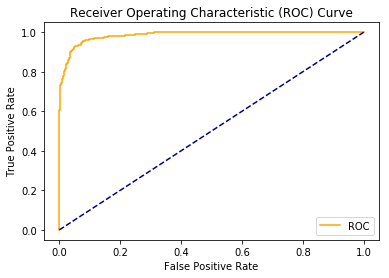

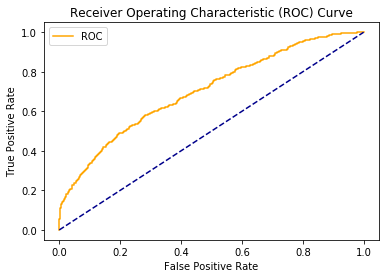

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
fpr1, tpr1, thresholds1 = roc_curve(y_val, rfc1.predict_proba(X_val)[:, 1])
plot_roc_curve(fpr, tpr)  
plot_roc_curve(fpr1, tpr1)

In [36]:
a = pd.DataFrame(y_test)

In [37]:
a['predict'] = rfc1.predict(X_test)

In [38]:
rfc1.feature_importances_

array([0.0391887 , 0.1485133 , 0.02433409, 0.01912306, 0.02566872,
       0.03621066, 0.02006717, 0.02854913, 0.02166024, 0.02913642,
       0.02437544, 0.0280705 , 0.02627285, 0.03093497, 0.0341753 ,
       0.03051911, 0.0344604 , 0.02828172, 0.0473376 , 0.03110678,
       0.01192623, 0.005775  , 0.05080053, 0.02581548, 0.01839154,
       0.04062257, 0.04180221, 0.03294405, 0.00759975, 0.05633646])

In [39]:
import keras
from keras.models import Sequential

Using TensorFlow backend.


In [40]:
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)
y_val = keras.utils.to_categorical(y_val, 2)
y_test1 = keras.utils.to_categorical(y_test1, 2)

In [48]:
from keras import Sequential
from keras.layers import Dense,Dropout

classifier = Sequential()
classifier.add(Dense(16, activation='sigmoid', kernel_initializer='random_normal', input_dim=30))
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(2, activation='sigmoid', kernel_initializer='random_normal'))

classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [49]:
classifier.fit(X_train,y_train,batch_size=10, epochs=20,validation_data=(X_val,y_val))

Train on 7599 samples, validate on 2534 samples
Epoch 1/20
7599/7599 [==============================] - 1s 158us/step - loss: 0.5536 - acc: 0.7530 - val_loss: 0.5255 - val_acc: 0.7474
Epoch 2/20
7599/7599 [==============================] - 1s 104us/step - loss: 0.5151 - acc: 0.7556 - val_loss: 0.5200 - val_acc: 0.7474
Epoch 3/20
7599/7599 [==============================] - 1s 113us/step - loss: 0.5106 - acc: 0.7556 - val_loss: 0.5163 - val_acc: 0.7490
Epoch 4/20
7599/7599 [==============================] - 1s 117us/step - loss: 0.5078 - acc: 0.7612 - val_loss: 0.5143 - val_acc: 0.7599
Epoch 5/20
7599/7599 [==============================] - 1s 119us/step - loss: 0.5061 - acc: 0.7675 - val_loss: 0.5138 - val_acc: 0.7719
Epoch 6/20
7599/7599 [==============================] - 1s 113us/step - loss: 0.5051 - acc: 0.7697 - val_loss: 0.5130 - val_acc: 0.7737
Epoch 7/20
7599/7599 [==============================] - 1s 101us/step - loss: 0.5042 - acc: 0.7717 - val_loss: 0.5119 - val_acc: 0.7755


In [77]:
from keras import metrics 
score_test = classifier.evaluate(X_test, y_test, verbose=0)
print('Test loss: %.4f'% score_test[0])
print('Test accuracy %.4f'% score_test[1])

Test loss: 0.4863
Test accuracy 0.7827


In [78]:
score_test1 = classifier.evaluate(X_test1, y_test1, verbose=0)
print('Test loss: %.4f'% score_test1[0])
print('Test accuracy %.4f'% score_test1[1])

Test loss: 0.4802
Test accuracy 0.7934


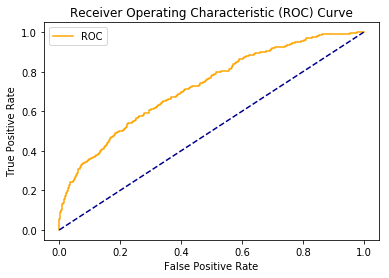

In [79]:
plot_roc_curve(roc_curve(y_test[:, 1], classifier.predict(X_test)[:, 1])[0],roc_curve(y_test[:, 1], classifier.predict(X_test)[:, 1])[1])